In [1]:
import pandas
import numpy

df = pandas.read_csv('../data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
subset = df[['ConvertedComp', 'JobSat']]
subset.head()

,ConvertedComp,JobSat
0,NaN,NaN
1,NaN,NaN
2,8820.0,Slightly satisfied
3,61000.0,Slightly satisfied
4,NaN,Slightly dissatisfied


In [3]:
subset = subset.dropna()
subset.head()

,ConvertedComp,JobSat
2,8820.0,Slightly satisfied
3,61000.0,Slightly satisfied
5,366420.0,Slightly satisfied
8,95179.0,Slightly satisfied
9,13293.0,Slightly dissatisfied


In [4]:
num_sats = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

sat_to_num = lambda row: num_sats.get(row['JobSat'])

In [5]:
subset['JobSatNum'] = subset.apply(sat_to_num, axis=1)
subset = subset[['ConvertedComp', 'JobSatNum']]
subset.head()

,ConvertedComp,JobSatNum
2,8820.0,4
3,61000.0,4
5,366420.0,4
8,95179.0,4
9,13293.0,2


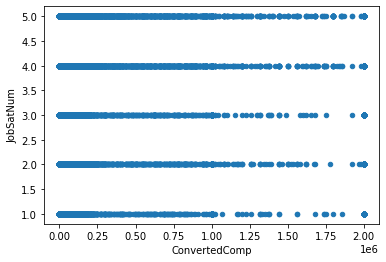

In [6]:
subset.plot.scatter(x='ConvertedComp', y='JobSatNum')

In [7]:
subset.corr()

,ConvertedComp,JobSatNum
ConvertedComp,1.000000,0.043482
JobSatNum,0.043482,1.000000


In [8]:
# There looks like there may be a slight positive correlation
# between a developer's salary and their job satisfaction,
# however, not a strong enough one to draw any conclusions

# Next I'll look at how the other tested factors affect job
# satisfaction when combined together, as although individually
# they don't show much promise, maybe together they'll show
# some correlation and produce a good model

In [9]:
categorical = df[['ConvertedComp', 'JobSat']]
categorical = categorical.dropna()

categorical.head()

,ConvertedComp,JobSat
2,8820.0,Slightly satisfied
3,61000.0,Slightly satisfied
5,366420.0,Slightly satisfied
8,95179.0,Slightly satisfied
9,13293.0,Slightly dissatisfied


In [10]:
means = subset.groupby('JobSatNum').mean()
means

,ConvertedComp
JobSatNum,
1,120739.585703
2,110360.994075
3,106379.734029
4,123414.081801
5,147949.915596


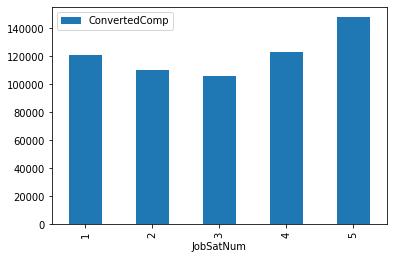

In [11]:
means.plot.bar()

In [12]:
from textwrap import wrap

new_indexes = []
for index in num_sats:
    new_indexes.append('\n'.join(wrap(index, 20)))

new_means = pandas.Series(means['ConvertedComp'].values, new_indexes)
new_means

Very dissatisfied                      120739.585703
Slightly\ndissatisfied                 110360.994075
Neither satisfied\nnor dissatisfied    106379.734029
Slightly satisfied                     123414.081801
Very satisfied                         147949.915596
dtype: float64

Text(0, 0.5, 'Mean annual salary (USD)')

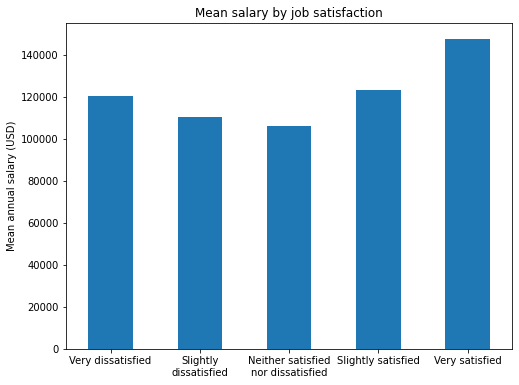

In [13]:
ax = new_means.plot.bar(figsize=(8, 6), rot=0)
ax.set_title('Mean salary by job satisfaction')
ax.set_ylabel('Mean annual salary (USD)')